In [23]:
import numpy as np
import matplotlib.pyplot as plt

[[ 97  42]
 [ 98  93]
 [ 61  62]
 [ 82  41]
 [ 55  91]
 [ 21  65]
 [ 16  59]
 [ 50  74]
 [ 66  52]
 [ 58  75]
 [ 12  69]
 [ 90  77]
 [  9  50]
 [ 10  34]
 [ 66  83]
 [ 13  64]
 [ 47  35]
 [ 45  25]
 [ 19  12]
 [ 60  24]
 [ 43  70]
 [ 78  83]
 [ 98  79]
 [ 40  88]
 [ 40  47]
 [ 80  27]
 [ 27  13]
 [ 40  16]
 [ 54  80]
 [ 10  92]
 [ 95  20]
 [ 73  24]
 [  6  29]
 [  7  57]
 [ 77  52]
 [ 80  13]
 [ 10 100]
 [ 78  59]
 [ 61  19]
 [ 11  93]]
[[ 0.         51.00980298 41.18252056 ... 25.49509757 42.72001873
  99.98499887]
 [51.00980298  0.         48.27007354 ... 39.44616585 82.73451517
  87.        ]
 [41.18252056 48.27007354  0.         ... 17.2626765  43.
  58.83026432]
 ...
 [25.49509757 39.44616585 17.2626765  ...  0.         43.46262762
  75.13321503]
 [42.72001873 82.73451517 43.         ... 43.46262762  0.
  89.30845425]
 [99.98499887 87.         58.83026432 ... 75.13321503 89.30845425
   0.        ]]
[37  5 24 17 32 19  4 25 15  7 13 16  8 38 31 27 21  0 39  9 20 14 34 26
  6 12 11 

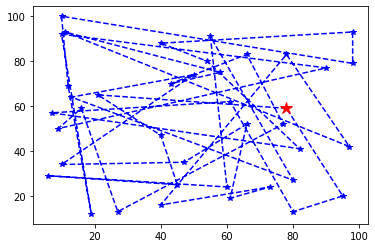

In [145]:
#5

def placeCitiesRandomly(n , xmax, ymax):
    return np.concatenate((np.random.randint(0, xmax+1, size=(n,1)),np.random.randint(0,ymax+1,size=(n,1))),axis=1)

def distance(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
def get_distances(city_map):
    return np.array([[distance(city_map[i], city_map[j]) for j in range(len(city_map))] for i in range(len(city_map))])
     
def objective(permutation, distances):
    s = 0
    for i in range(len(permutation)):
        s += distances[permutation[i], permutation[(i+1)%len(permutation)]]
    return s

def plotSolution(permutation, city_map):
    permutation = np.append(permutation, permutation[0])
    plt.plot(city_map[permutation, 0], city_map[permutation, 1], '--*b')
    plt.plot([city_map[permutation[0], 0]], [city_map[permutation[0], 1]], '*r', markersize=12)
    plt.show()
    
city_map = placeCitiesRandomly(40, 100, 100)
distances = get_distances(city_map)
print(city_map)
print(distances)
permutation = np.arange(len(city_map))
np.random.shuffle(permutation)
print(permutation)
print(objective(permutation, distances))
plotSolution(permutation, city_map)

In [99]:
def random_permutation(n):
    permutation = np.arange(len(city_map))
    np.random.shuffle(permutation)
    return permutation

In [147]:
def mutation1(permutation):
    pos = np.random.randint(len(permutation))
    temp = permutation[pos]
    permutation[pos] = permutation[(pos+1)%len(permutation)] 
    permutation[(pos+1)%len(permutation)] = temp

def mutation2(permutation):
    first = np.random.randint(len(permutation))
    second = first
    while second == first:
        second = np.random.randint(len(permutation))
    temp = permutation[first]
    permutation[first] = permutation[second]
    permutation[second] = temp
    
def order_crossover(p1, p2):
    n = len(p1)
    parents = (p1, p2)
    childs = []
    for p in range(2):
        parent1 = parents[p]
        parent2 = parents[1-p]
        
        subpath = np.random.randint(n)
        k = np.random.randint(1, n//2+1)
        #k = n-4
        child = np.full((n,), -1)

        for i in range(subpath, subpath+k):
            child[i%n] = parent1[i%n]
        for i in range(subpath+k, subpath+n):
            previous = child[(i-1)%n]
            for j in range(n):
                if parent2[j] == previous:
                    j+=1
                    while parent2[j%n] in child:
                        j+=1
                    child[i%n] = parent2[j%n]
                    break
        childs.append(child)
    return childs[0], childs[1]
                    
    
order_crossover([1, 2, 3, 4, 0], [1, 4, 3, 0, 2])

(array([1, 4, 3, 0, 2]), array([3, 4, 1, 0, 2]))

0  :  1752.1837468529056
1  :  1698.7252662022245
2  :  1603.2177304320892
3  :  1493.8657288139486
4  :  1439.6985774172415
5  :  1424.8626035323916
6  :  1354.2439975132572
7  :  1354.243997513257
8  :  1308.582335530797
9  :  1262.4464530859382
11  :  1262.1891806564295
12  :  1240.8586867019205
13  :  1209.5852024314784
14  :  1174.1933766387174
16  :  1149.2011889924884
17  :  1100.2520399653595
18  :  1050.9466387359969
19  :  1029.2545700623232
20  :  1014.3964329241618
23  :  970.4545749083155
24  :  962.3152681555758
25  :  896.8088065145738
26  :  885.301340223261
27  :  884.3368225750335
29  :  876.552188209482
30  :  849.222270431275
31  :  834.9257264435761
33  :  817.7465659326905
34  :  805.9260251241111
36  :  805.9260251241109
37  :  797.3984336008808
38  :  779.99355174068
39  :  779.5195792968397
40  :  772.4149380998718
41  :  768.566445201796
43  :  766.3364055558491
44  :  764.772328660773
45  :  743.7023919709703
46  :  743.7023919709702
47  :  737.6551954045752


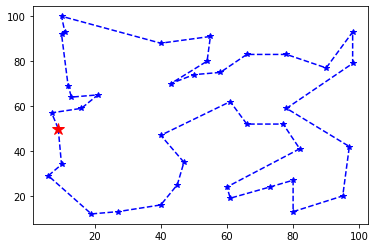

In [156]:
def EVOLUTION_iter(population, distances, mu, pm):
    childs = []
    np.random.shuffle(population)
    for i in range(mu):
        child1, child2 = order_crossover(population[i], population[(i+1)%mu])
        if np.random.random() < pm:
            mutation2(child1)
        if np.random.random() < pm:
            mutation2(child2)
        childs.append(child1)
        childs.append(child2)
    costs = [(child, objective(child, distances)) for child in childs] + \
        [(parent, objective(parent, distances)) for parent in population]
    costs.sort(key=lambda x: x[1])
    return [costs[i][0] for i in range(mu)], costs[0][0], costs[0][1]
    
def EVOLUTION(distances, n_iter, mu, pm):
    population = [random_permutation(len(city_map)) for i in range(mu)]
    n_fail = 0
    cost = np.inf
    for i in range(n_iter):
        population, best_permutation, new_cost = EVOLUTION_iter(population, distances, mu, pm)
        if new_cost >= cost:
            n_fail += 1
            if n_fail == 100:
                return best_permutation, cost
        else:
            cost = new_cost
            print(i, " : ", cost)
            n_fail = 0
    return best_permutation, cost    
    
best_permutation, cost = EVOLUTION(distances, n_iter=1000, mu=100, pm=0.2)
plotSolution(best_permutation, city_map)

In [150]:
params=([100,500],[])